In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv')

In [4]:
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [5]:
df.shape

(2500, 10)

In [6]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [7]:
# There is no requirement for USER ID. So, We will drop it
df.drop(['User ID'], axis = 1 , inplace = True)

In [8]:
df.drop_duplicates() # Dropping duplicates if present

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...
2495,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription Type  2500 non-null   object
 1   Monthly Revenue    2500 non-null   int64 
 2   Join Date          2500 non-null   object
 3   Last Payment Date  2500 non-null   object
 4   Country            2500 non-null   object
 5   Age                2500 non-null   int64 
 6   Gender             2500 non-null   object
 7   Device             2500 non-null   object
 8   Plan Duration      2500 non-null   object
dtypes: int64(2), object(7)
memory usage: 175.9+ KB


# Exploratory Data Analysis

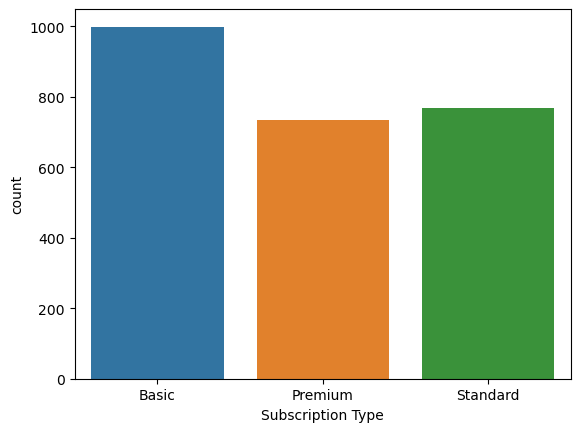

In [10]:
# This Countplot show how many subscriptions are buyed according to type of subscription
sns.countplot(x="Subscription Type", data=df)
plt.show()

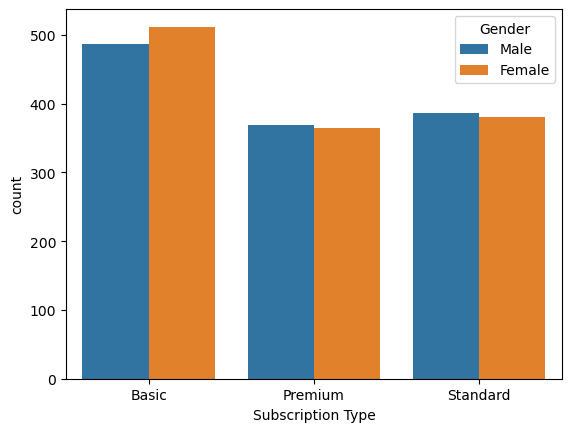

In [11]:
# This section show gender-wise interest of subscription type 
sns.countplot(x="Subscription Type", hue="Gender",data=df)
plt.show()

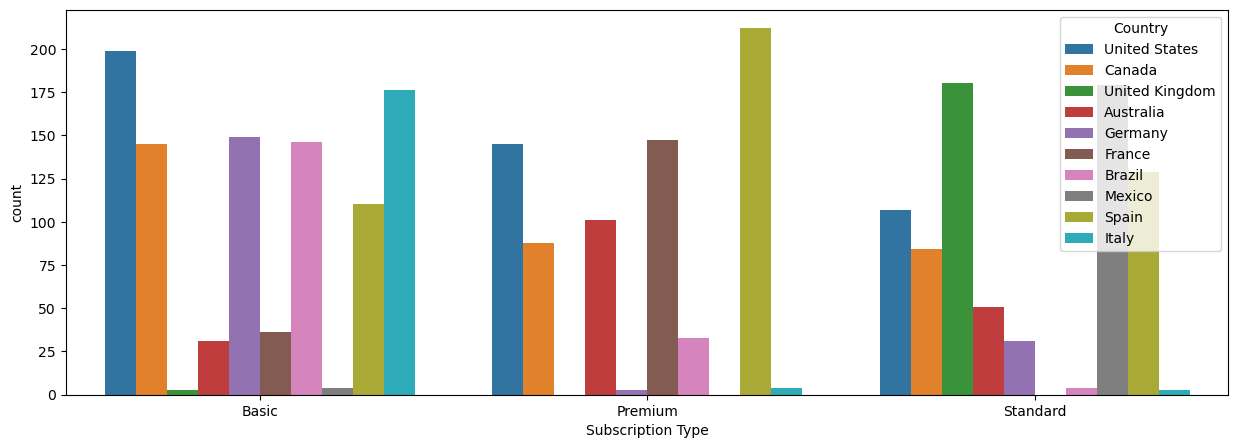

In [12]:
# This section show country-wise subscription type 
plt.figure(figsize=(15,5))
sns.countplot(x="Subscription Type", hue="Country",data=df)
plt.show()

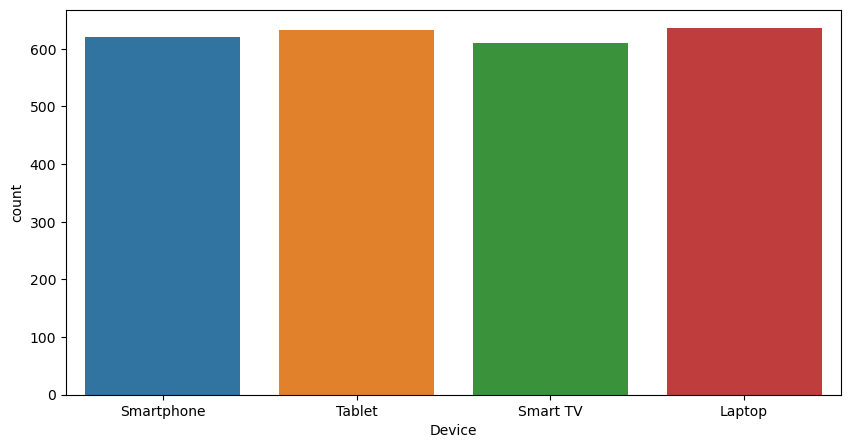

In [13]:
# This shows which device is used to watch netflix
plt.figure(figsize=(10,5))
sns.countplot(x="Device",data=df)
plt.show()

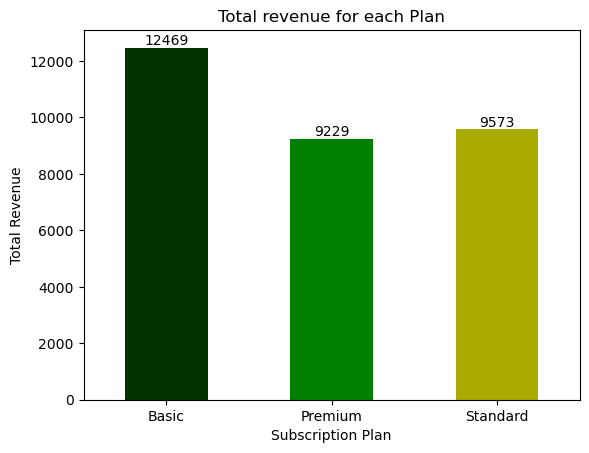

In [14]:
# Checking for which subscription type generate high revenue
ax = df.groupby('Subscription Type')['Monthly Revenue'].agg('sum').plot(kind='bar', color=['#030','#017F00' ,'#AAAA00'])
plt.xticks(rotation=0)
plt.title('Total revenue for each Plan')
plt.xlabel('Subscription Plan')
plt.ylabel('Total Revenue')
for i in ax.containers:
    ax.bar_label(i,)

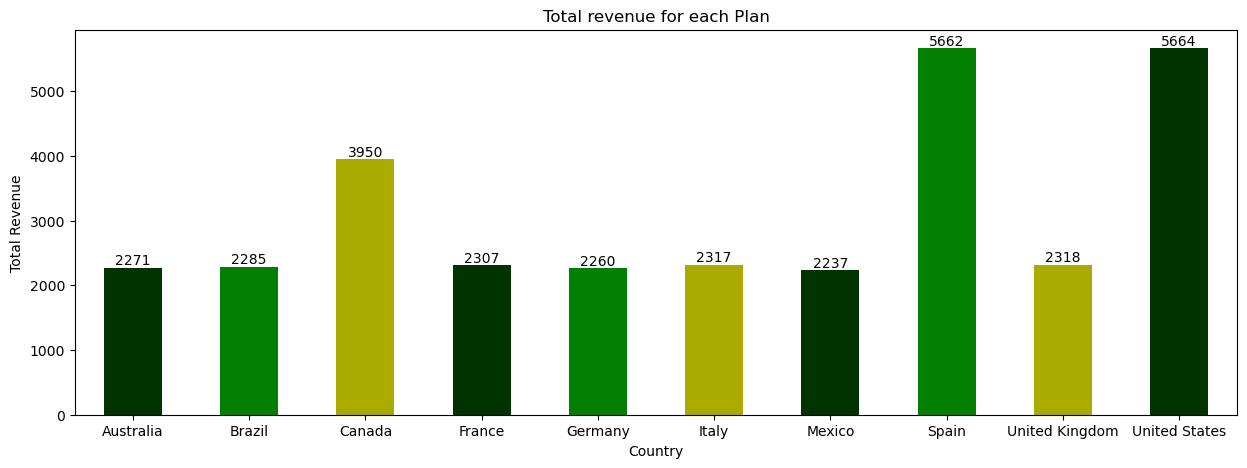

In [15]:
# checking for which country generate high revenue
plt.figure(figsize=(15,5))
ax = df.groupby('Country')['Monthly Revenue'].agg('sum').plot(kind='bar', color=['#030','#017F00' ,'#AAAA00'])
plt.xticks(rotation=0)
plt.title('Total revenue for each Plan')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
for i in ax.containers:
    ax.bar_label(i,)